In [38]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import seaborn as sns

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [43]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [44]:
TRAIN_DATASET_PATH = './train_case3.csv'
#train = pd.read_csv('train.csv').fillna('').sample(frac=1)
#train.head(3)

In [45]:
df = pd.read_csv(TRAIN_DATASET_PATH, sep = ";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [47]:
TARGET_NAME = 'cardio'

In [48]:
df[TARGET_NAME].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [49]:
NUM_FEATURE_NAMES = ['age', 'height', 'weight','ap_hi', 'ap_lo']
CAT_FEATURE_NAMES = ['gender', 'cholesterol']
BASE_FEATURE_NAMES = ['gluc', 'smoke', 'alco', 'active']
SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + CAT_FEATURE_NAMES + BASE_FEATURE_NAMES

In [50]:
for i in SELECTED_FEATURE_NAMES:
    df[i].fillna(df[i].mode()[0], inplace=True)    

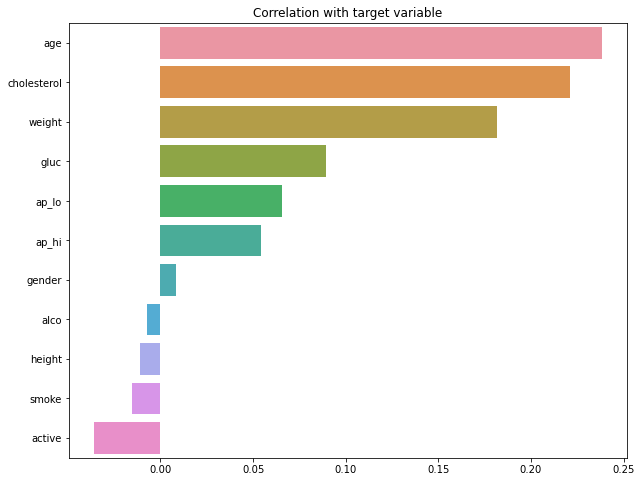

In [53]:
corr_with_target = df[SELECTED_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable')
plt.show()

In [54]:
#plt.figure(figsize = (20,15))

#sns.set(font_scale=1.4)

#corr_matrix = df[BASE_FEATURE_NAMES].corr()
#corr_matrix = np.round(corr_matrix, 2)
#corr_matrix[np.abs(corr_matrix) < 0.3] = 0

#sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

#plt.title('Correlation matrix')
#plt.show()

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [56]:
#scaler = StandardScaler()

#df_norm = df.copy()
#df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

#df = df_norm.copy()

Save current dataset

In [57]:
UPDATED_DATASET_PATH = './new_train.csv'
df.to_csv(UPDATED_DATASET_PATH, index=False, encoding='utf-8')

Model learning